# Part I - Dataset Exploration for Ford GoBike System Data
## by Sarah Ali

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
> For this analysis I went ahead to gather datasets for the first year quater January - April 2019 from this link: https://s3.amazonaws.com/baywheels-data/index.html

> Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around


## Preliminary Wrangling


In [1]:
# import all packages needed for exploration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [27]:
# merge all four csv files into one for the first quater.
ford_data = pd.concat(
            map(pd.read_csv, ['January-fordgobike-tripdata.csv', 'Feb-fordgobike-tripdata.csv', 'March-fordgobike-tripdata.csv',
                                 'April-fordgobike-tripdata.csv']), ignore_index=True, sort = False)
ford_data.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,member_birth_year,member_gender
89574,1592,2019-01-20 20:38:21.4610,2019-01-20 21:04:53.8680,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,2832,Customer,No,NaN,NaN
192814,1939,2019-02-28 20:08:56.7470,2019-02-28 20:41:16.5700,160.0,West Oakland BART Station,37.805318,-122.294837,274.0,Oregon St at Adeline St,37.857567,-122.267558,2997,Subscriber,No,1994.0,Female
210165,496,2019-02-26 19:26:11.3040,2019-02-26 19:34:27.6320,64.0,5th St at Brannan St,37.776754,-122.399018,60.0,8th St at Ringold St,37.774520,-122.409449,5413,Subscriber,No,1987.0,Male
261132,736,2019-02-19 20:15:46.5840,2019-02-19 20:28:02.7400,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,66.0,3rd St at Townsend St,37.778742,-122.392741,1672,Subscriber,No,1977.0,Female
690788,210,2019-04-22 09:00:22.7580,2019-04-22 09:03:53.5620,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,58.0,Market St at 10th St,37.776619,-122.417385,2941,Subscriber,No,NaN,NaN


In [3]:
ford_data.shape

(870904, 16)

In [4]:
ford_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,870904.000000,870174.000000,870904.000000,870904.000000,870174.000000,870904.000000,870904.000000,870904.000000,175147.000000
mean,776.665073,139.027635,37.771409,-122.354787,137.507940,37.770832,-122.352015,4284.292828,1984.806437
std,1904.675372,113.704274,0.105744,0.174646,113.653225,0.197522,0.568010,1874.995593,10.116689
min,61.000000,3.000000,0.000000,-122.453704,3.000000,0.000000,-122.453704,11.000000,1878.000000
25%,337.000000,44.000000,37.770407,-122.413004,44.000000,37.770407,-122.411738,2916.000000,1980.000000
50%,537.000000,102.000000,37.780787,-122.398438,100.000000,37.781010,-122.398285,4882.000000,1987.000000
75%,840.000000,238.000000,37.797280,-122.291376,233.000000,37.797320,-122.291415,5568.000000,1992.000000
max,86114.000000,420.000000,37.880222,0.000000,420.000000,37.880222,0.000000,7108.000000,2001.000000


In [5]:
ford_data.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id              730
start_station_name            730
start_station_latitude          0
start_station_longitude         0
end_station_id                730
end_station_name              730
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
bike_share_for_all_trip         0
member_birth_year          695757
member_gender              695757
dtype: int64

In [28]:
#Create a new column to calculate age of Members
ford_data['member_age'] = 2022 - ford_data['member_birth_year']


In [39]:
#create a copy dataframe for exploration
ford_cleandata = ford_data.copy()

In [43]:
#drop columns not needed for analysis
ford_cleandata.drop(['start_station_id','end_station_id','start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude','member_birth_year'],axis=1, inplace=True)
ford_cleandata.sample(10)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,bike_share_for_all_trip,member_gender,member_age
275834,1230,2019-02-17 20:33:08.892,2019-02-17 20:53:39.250,Market St at Dolores St,2nd St at Townsend St,5226,Subscriber,No,Male,47.0
681550,180,2019-04-23 12:55:32.878,2019-04-23 12:58:33.358,Washington St at Kearny St,Clay St at Battery St,1168,Subscriber,No,NaN,NaN
159257,326,2019-01-08 09:22:33.134,2019-01-08 09:27:59.996,Folsom St at 3rd St,Mechanics Monument Plaza (Market St at Bush St),4733,Subscriber,No,NaN,NaN
457618,507,2019-03-21 18:33:01.426,2019-03-21 18:41:28.660,Mission Playground,S Van Ness Ave at Market St,6443,Subscriber,No,NaN,NaN
480150,517,2019-03-19 17:07:08.885,2019-03-19 17:15:46.766,4th St at Harrison St,Mississippi St at 17th St,5936,Subscriber,No,NaN,NaN
286768,1018,2019-02-15 15:52:27.046,2019-02-15 16:09:25.882,Jackson Playground,San Francisco Ferry Building (Harry Bridges Pl...,3223,Subscriber,No,Male,51.0
594894,1084,2019-03-06 17:10:53.872,2019-03-06 17:28:58.785,West Oakland BART Station,West Oakland BART Station,5985,Subscriber,No,NaN,NaN
173691,711,2019-01-04 16:12:39.862,2019-01-04 16:24:31.520,The Embarcadero at Steuart St,Berry St at 4th St,5029,Subscriber,No,NaN,NaN
359053,638,2019-02-04 17:50:49.115,2019-02-04 18:01:27.768,2nd St at Folsom St,San Francisco Caltrain Station 2 (Townsend St...,3299,Subscriber,No,Male,30.0
673479,911,2019-04-24 13:51:19.369,2019-04-24 14:06:31.311,Civic Center/UN Plaza BART Station (Market St ...,19th St at Florida St,1199,Customer,No,NaN,NaN


In [7]:
#check for missing data
ford_cleandata.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_name            730
end_station_name              730
bike_id                         0
user_type                       0
bike_share_for_all_trip         0
member_gender              695757
member_age                 695757
dtype: int64

In [40]:
#Drop null rows in start_station_name and end_station_name
ford_cleandata.dropna(subset=['start_station_name'], inplace=True)
ford_cleandata.dropna(subset=['end_station_name'], inplace=True)


In [41]:
#change data types for start time, end time
ford_cleandata['start_time'] = pd.to_datetime(ford_cleandata['start_time'])
ford_cleandata['end_time'] = pd.to_datetime(ford_cleandata['end_time'])

In [44]:
ford_cleandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870174 entries, 0 to 870903
Data columns (total 10 columns):
duration_sec               870174 non-null int64
start_time                 870174 non-null datetime64[ns]
end_time                   870174 non-null datetime64[ns]
start_station_name         870174 non-null object
end_station_name           870174 non-null object
bike_id                    870174 non-null int64
user_type                  870174 non-null object
bike_share_for_all_trip    870174 non-null object
member_gender              174952 non-null object
member_age                 174952 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(2), object(5)
memory usage: 73.0+ MB


In [34]:
ford_cleandata.shape

(870174, 10)

### What is the structure of your dataset?

> After basic cleaning the dataset contains 870174 rows and 10 columns: With Missing values in member_age and member-gender, this is a very high number and can not be dropped. 7 columns had been dropped as i would not be needing them for analysis - start_station_id','end_station_id','start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude','member_birth_year 

### What is/are the main feature(s) of interest in your dataset?

>   1.Trip duration (time)
    2.Distribution of User Type
    3.Monthly bike ride trend
    4.Does Age have correlation with how long a rider rides 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  The duration_sec column will provide infomation we need to calculate the average trip time. The user-type column willl be used to find the distribution. Also, we can extract exact month from start_time and end time he duration_sec column will define the average trip timefor further analysis.
The age of riders has been calculated from the birth year column of riders. 

## Univariate Exploration

### Distribution of User Type

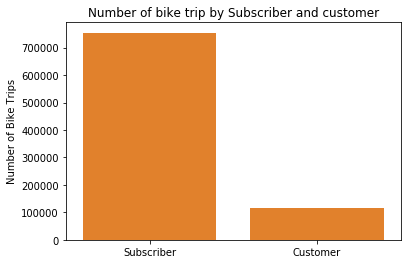

In [9]:
#Create a countplot that shows relationship of usertypes

base_color = sb.color_palette()[1]
plot = sb.countplot(data=ford_cleandata, x='user_type',color=base_color)
plt.xlabel('')
plt.ylabel('Number of Bike Trips')
plt.title('Number of bike trip by Subscriber and customer');
#show the plot
plt.show()

This shows that the subscribers tend to take more rides than customers of the Ford go bike system

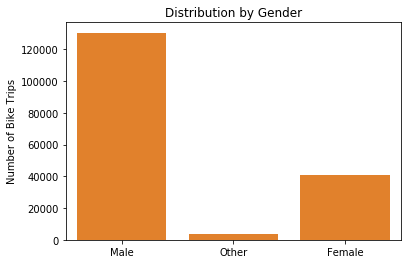

In [13]:
#Create a countplot that shows relationship of riders by gender

base_color = sb.color_palette()[1]
plot = sb.countplot(data=ford_cleandata, x='member_gender',color=base_color)
plt.xlabel('')
plt.ylabel('Number of Bike Trips')
plt.title('Distribution by Gender');
#show the plot
plt.show()

A large number of riders are male, while a portion are female, a less portion may have reasons for not revealing their gender.

### Age distribution

In [14]:
#the unique counts of age of riders
ford_cleandata.member_age.value_counts()

34.0     10214
29.0      9323
33.0      8967
32.0      8640
31.0      8484
30.0      8245
35.0      8010
36.0      7953
28.0      7654
27.0      7420
37.0      7023
38.0      6557
39.0      5953
42.0      5011
40.0      4987
26.0      4637
41.0      4344
43.0      3756
25.0      3476
24.0      3208
44.0      2830
45.0      2706
48.0      2633
23.0      2504
47.0      2503
46.0      2435
49.0      2080
54.0      1927
51.0      1924
50.0      1909
         ...  
68.0       301
70.0       189
71.0       180
72.0       178
69.0       158
75.0       135
67.0       134
77.0       105
73.0        99
91.0        89
122.0       53
74.0        51
21.0        34
79.0        30
80.0        21
89.0        20
76.0        19
120.0       11
83.0        11
81.0         9
121.0        6
84.0         3
102.0        3
88.0         2
78.0         2
92.0         1
112.0        1
94.0         1
95.0         1
144.0        1
Name: member_age, Length: 75, dtype: int64

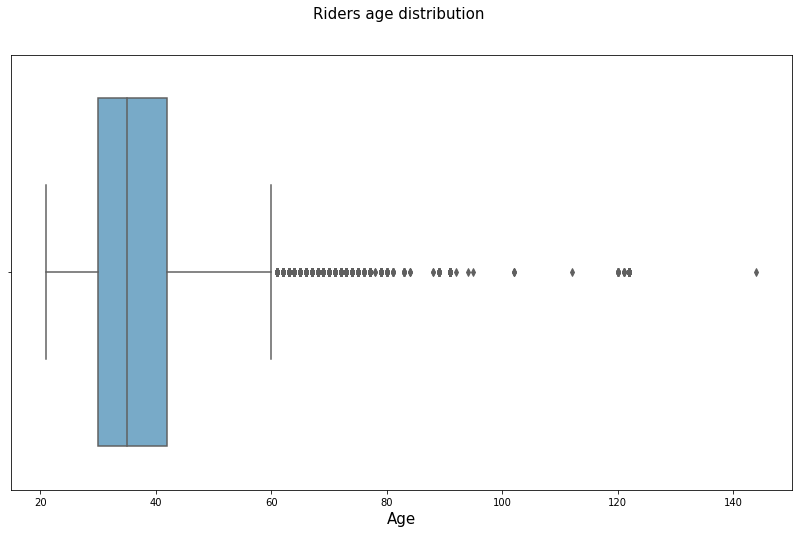

In [15]:
#a graph to show age distribution
plt.figure(figsize=(14,8))
sb.boxplot(x='member_age', data=ford_cleandata, palette='Blues')
plt.title("Riders age distribution ", fontsize=15, y=1.07)
plt.xlabel("Age", fontsize=15);

Outliers are shown so we will drop rows with abnormal age, from 100 and above

In [35]:
#Drop rows with abnormal age, 100 and above
ford_cleandata =ford_cleandata[ford_cleandata['member_age'] <= 100]

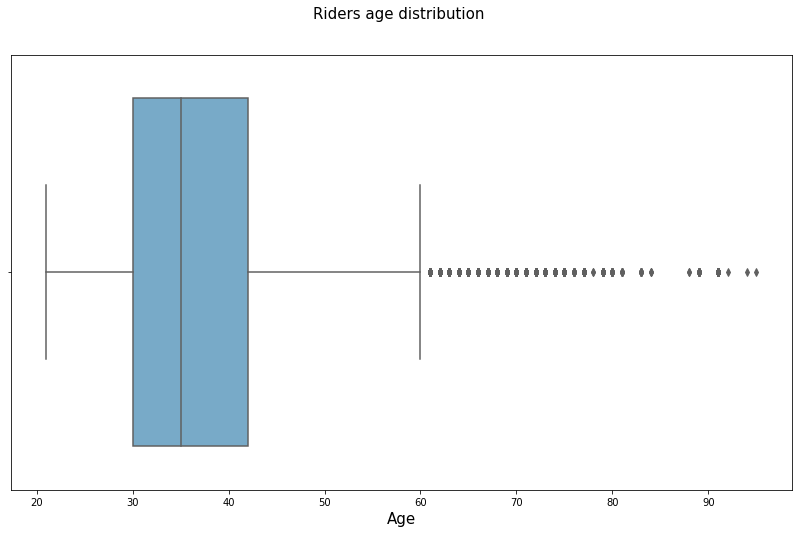

In [36]:
#recheck with a graph to show age distribution
plt.figure(figsize=(14,8))
sb.boxplot(x='member_age', data=ford_cleandata, palette='Blues')
plt.title("Riders age distribution ", fontsize=15, y=1.07)
plt.xlabel("Age", fontsize=15);

In [38]:
ford_cleandata.sample(10)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,bike_share_for_all_trip,member_gender,member_age
243746,340,2019-02-21 17:53:10.277,2019-02-21 17:58:51.047,Downtown Berkeley BART,Bancroft Way at College Ave,5785,Subscriber,No,Male,35.0
302167,751,2019-02-12 18:13:22.191,2019-02-12 18:25:53.281,Salesforce Transit Center (Natoma St at 2nd St),Berry St at King St,5014,Subscriber,No,Male,31.0
262844,1035,2019-02-19 17:50:57.700,2019-02-19 18:08:13.495,Beale St at Harrison St,23rd St at Tennessee St,5016,Subscriber,No,Female,42.0
359828,587,2019-02-04 16:51:49.227,2019-02-04 17:01:36.511,Folsom St at 3rd St,3rd St at Townsend St,5150,Subscriber,No,Male,29.0
374105,783,2019-02-01 08:34:39.943,2019-02-01 08:47:43.895,Howard St at Beale St,8th St at Ringold St,987,Subscriber,No,Male,35.0
196312,535,2019-02-28 16:13:34.907,2019-02-28 16:22:30.448,Howard St at 2nd St,San Francisco Caltrain (Townsend St at 4th St),1832,Subscriber,No,Male,41.0
309388,557,2019-02-11 22:43:10.139,2019-02-11 22:52:27.281,Jones St at Post St,16th St Mission BART Station 2,2497,Subscriber,No,Male,35.0
227920,493,2019-02-23 17:36:45.529,2019-02-23 17:44:58.742,MLK Jr Way at 14th St,MLK Jr Way at 14th St,5620,Subscriber,No,Male,54.0
268548,750,2019-02-19 08:14:14.301,2019-02-19 08:26:44.606,San Francisco Caltrain (Townsend St at 4th St),Howard St at Beale St,2714,Subscriber,No,Male,46.0
311213,179,2019-02-11 18:13:27.178,2019-02-11 18:16:26.643,West Oakland BART Station,Union St at 10th St,275,Subscriber,No,Male,36.0


Most of the riders are ranged from ages 30 - 45 years old which makes sense for long distance races

### Monthly bike ride trend

In [45]:
ford_cleandata['month'] = ford_cleandata.start_time.dt.month

In [46]:
ford_cleandata['month'].value_counts()

3    256078
4    239047
1    191834
2    183215
Name: month, dtype: int64

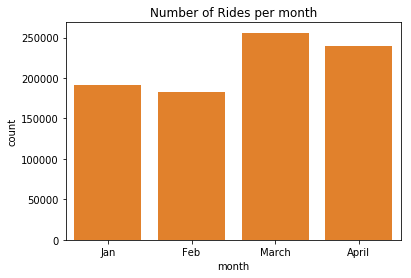

In [47]:
sb.countplot(data=ford_cleandata, x='month', color=sb.color_palette()[1])
plt.title('Number of Rides per month');
plt.xticks([0, 1, 2, 3], ['Jan', 'Feb', 'March', 'April']);

### Trip duration (time)

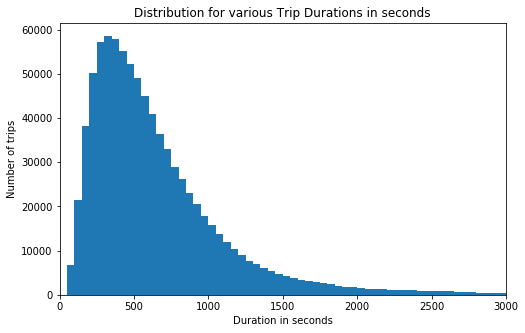

In [48]:
# Plot a histogram representing time spent on each race in seconds
binsize = 50
bins = np.arange(50, ford_cleandata['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = ford_cleandata, x = 'duration_sec', bins=bins)
plt.title('Distribution for various Trip Durations in seconds')
plt.xlabel('Duration in seconds')
plt.ylabel('Number of trips')
plt.xlim([0, 3000]);

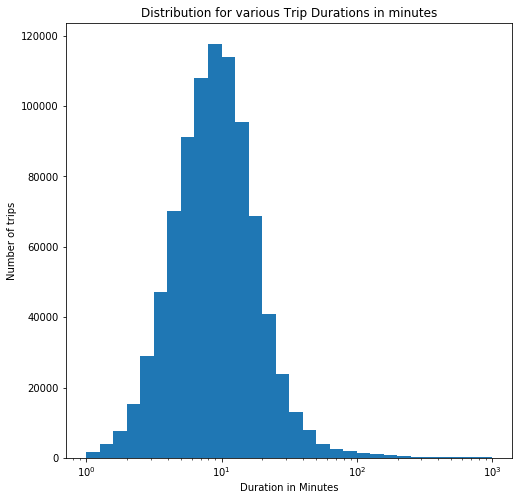

In [49]:
#to get the average duration of a races in minutes, we will convert the seconds column to minutes
ford_cleandata['race_mins'] = ford_cleandata['duration_sec'] / 60

plt.figure(figsize=[8,8])
bins =10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(ford_cleandata['race_mins'],bins=bins)
plt.xticks(ticks,labels)
plt.xscale('log')
plt.title('Distribution for various Trip Durations in minutes')
plt.xlabel('Duration in Minutes')
plt.ylabel('Number of trips')
plt.show()


### Bike Share for all rides

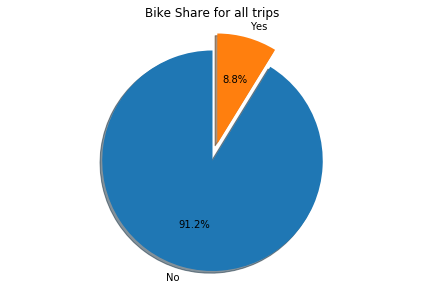

In [33]:
# By plotting a pie graph, we call tell the distribution of bikes.

labels = list(ford_cleandata.bike_share_for_all_trip.unique())
sizes = ford_cleandata.bike_share_for_all_trip.value_counts()
explode = (0.16, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90 , explode = explode )

ax1.axis('equal')  
plt.tight_layout()
plt.title('Bike Share for all trips')
plt.show()

A very low proportion of bike riders shared bikes compared to those who weren't.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> 
Age: most of riders age falls between 30 and 45 years old. 

Gender: A large number of riders are male, while a portion are female, a less portion may have reasons for not revealing their gender. it needs more investigationg because a lot of riders did not indicate their gender, and this would be difficult to determine. 

Subscribe: the number of trips in subscribers is more than the number in customers this may be because of pricing and population.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The new column age had a lot of outliers, that has been dealth with by dropping rows with high numbers.
> New column to calculate the month in which a race was done.

## Bivariate Exploration

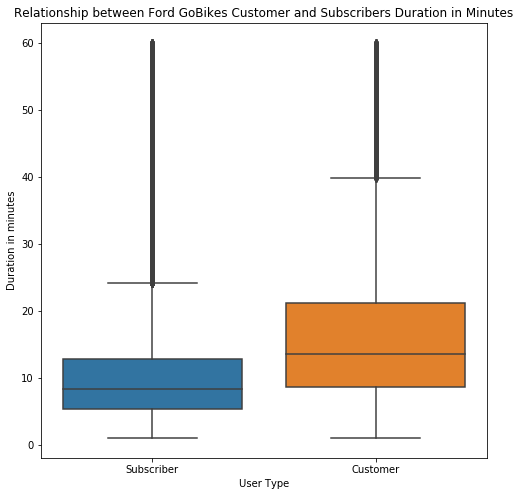

In [50]:
#A boxplot will show the relationship between usertypes and duration of bike trips
plt.figure(figsize = [8, 8])
base_color = sb.color_palette()[3]
sb.boxplot(data = ford_cleandata.query('race_mins <= 60'), x = 'user_type', y = 'race_mins')
plt.title('Relationship between Ford GoBikes Customer and Subscribers Duration in Minutes')
plt.xlabel('User Type')
plt.ylabel('Duration in minutes')
plt.show()


Customers had longer bike trips than subscribers

Text(0.5,1,'Distribution of Bike Share per Month')

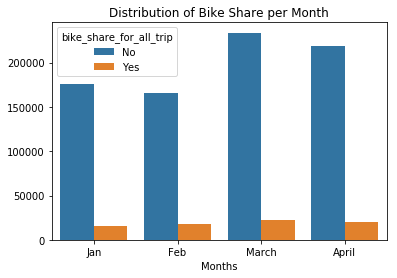

In [35]:
#use a countplot to show the relationship between the distribution of bike share and the month it was shared.
sb.countplot(data=ford_cleandata, x='month', hue='bike_share_for_all_trip')
plt.xticks([0, 1, 2, 3], ['Jan', 'Feb', 'March', 'April']);
plt.xlabel('Months')
plt.ylabel('')
plt.title("Distribution of Bike Share per Month")

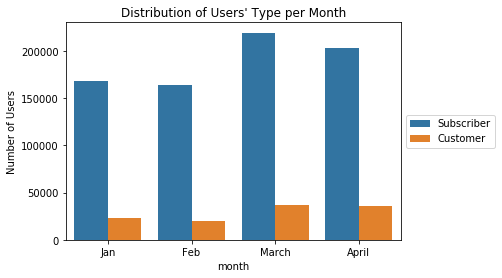

In [39]:
#a countplot to show the relationship between user types and the month of each trip
g = sb.countplot(data=ford_cleandata, x='month', hue='user_type')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([0, 1, 2, 3], ['Jan', 'Feb', 'March', 'April']);
#plt.xlabel('Months')
plt.ylabel('Number of Users')
plt.title("Distribution of Users' Type per Month");


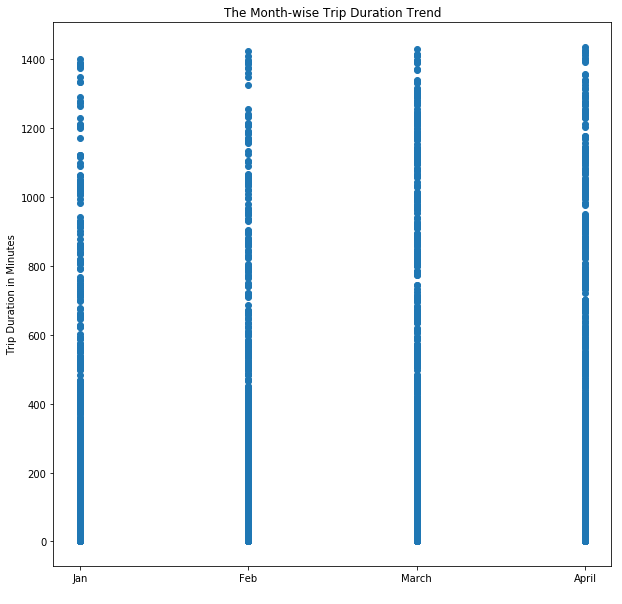

In [40]:
# Makes the figure enlarged for better visualization 
plt.figure(figsize = [10,10]) 
plt.scatter(data = ford_cleandata , x = 'month' , y = 'race_mins')
plt.xticks([1, 2, 3, 4 ], ['Jan', 'Feb', 'March', 'April']);
plt.title('The Month-wise Trip Duration Trend')
plt.xlabel(' ')
plt.ylabel('Trip Duration in Minutes');


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Younger riders between the age 20 and 45 tend to take more rides than older people.
> A high percentage of riders are customers compared to subscribers.
> Female users average bike trip duration is slightly more than male users.
> Subscribed users numbers are way more greater than customers despite of the gender.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Trip duration in female users and customer users is longer despite of their low count in the dataset
> A lot of missing data for gender and age, so we cannot base any conclusion on those two observations

## Multivariate Exploration

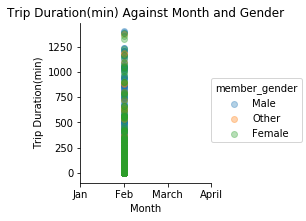

In [51]:
# Find out if Gender affects a trip duration during thr first quater of the year using a scatter plot
graph = sb.FacetGrid(data = ford_cleandata, hue = 'member_gender')
graph.map(plt.scatter, 'month','race_mins', alpha = 1/3).add_legend()
plt.xticks([1, 2, 3, 4 ], ['Jan', 'Feb', 'March', 'April'])
plt.title('Trip Duration(min) Against Month and Gender')
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)');

Only Feburay bike riders gave gender details so no valid conclusion can be drawn from this

### Does duration of trip affects the user types and the month

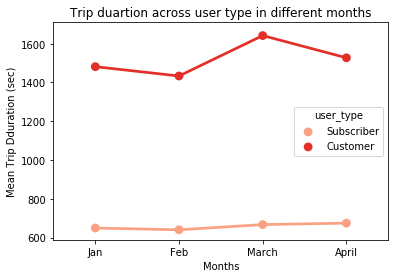

In [42]:
#finding how duration affects the user types and the month
sb.pointplot(data = ford_cleandata, x = 'month', y = 'duration_sec', hue = 'user_type', palette = 'Reds', ci=None)
plt.title('Trip duartion across user type in different months')
plt.xticks([0, 1, 2, 3], ['Jan', 'Feb', 'March', 'April']);
plt.ylabel('Mean Trip Dduration (sec)')
plt.xlabel('Months')
plt.show();

The Customers had longer trips and this is spread across the four months

### Does age affect how long a biker rode, and whats the relationship with user type also 

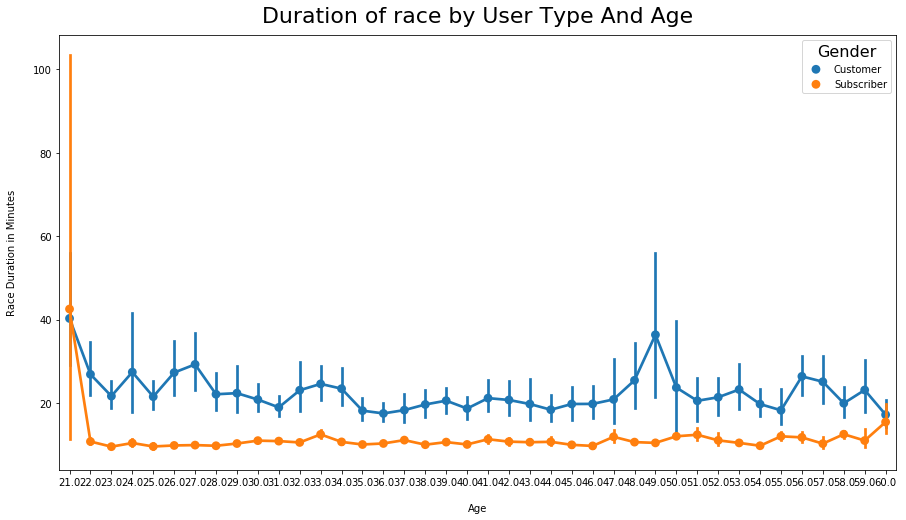

In [52]:
plt.figure(figsize=(15,8))
ax = sb.pointplot(x='member_age', y='race_mins', hue='user_type',data=ford_cleandata.query('member_age <= 60'))
plt.title('Duration of race by User Type And Age', fontsize=22, y=1.015)
plt.xlabel('Age', labelpad=16)
plt.ylabel('Race Duration in Minutes', labelpad=16)
leg = ax.legend()
leg.set_title('Gender',prop={'size':16})
ax = plt.gca();

## Conclusions
> The dataset is for the first 4 months in the year 2019, January, Febuary,March and April.
> A large number of riders are male, while a portion are female, a less portion may have reasons for not revealing their gender.
> Outliers are shown so we will drop rows with abnormal age, from 100 and above.
> Most of the riders are ranged from ages 30 - 45 years old which makes sense for long distance races.
> A lot of the bikes rides are covered in short minutes, the average trips takes around 500 - 550 seconds. The age disparity and the duration of trips shows that younger people takes shorter trips compared to older people. 
> A very low proportion of bike riders shared bikes compared to those who weren't.
> The category user type shows that a over 80% of riders are subscribers as compared to nearly 20% of customers, this may be linked to the prices of hikes and funding system needed to take on a trip.This has a great effect on the number of trips taken and the duration of it. Subscribers takes longer and more trips than customers. 

## Recommendation:
> Ford go bike should make conscious effort to make more users subscribers. Marketing strategy should be put in place to get new subscribers or convert customers to subscribers. 

In [53]:
ford_cleandata.to_csv('ford_cleandata1.csv')